<a href="https://colab.research.google.com/github/SAMAWELJABALLI/TweetsSentimentAnalysis/blob/main/Sequence_Model_Results_Corpus1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.utils import resample
    
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.models import load_model

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# Load data and set labels from corpus 1 
data = pd.read_csv('/content/cleaned_data.csv')
print(f'Shape of data is {data.shape}')
# Display 20 random samples
data.sample(20)

Shape of data is (199097, 3)


,ID,label,text_clean
7363,7363,1,['No content']
72943,24911,1,['تطبيق متميز احسن الموقع']
4408,4408,1,['معلم عجبني تصرفو كيف قام عطا كلمتين خرج']
6723,6723,1,['beravo aymona rabi wlh tebrkala rabi']
160579,30055,0,['riehi degage montasar lazem']
171306,41160,0,['si slim mais groupèt lclub houmà akther bèch...
149792,18878,0,['dr moncef mahouwech cpr enti']
170736,40569,1,['rabi ester']
8023,8023,1,['واصل عاءشة احترام المشاهدين']
84168,37078,1,['mais ne sais pas pourquoi nai plus le mode p...


In [ ]:
def get_max_length():
    
    review_length = []
    for review in data['text_clean']:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))


max_length = get_max_length()
print('Maximum review length: ', max_length)

labels = np.array(data['label'])
y = []
for i in range(len(labels)):
    if labels[i] == 0:
        y.append(0)
    if labels[i] == 1:
        y.append(1)

y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 2, dtype="int")
X_train, X_test, Y_train, Y_test = train_test_split(data['text_clean'], labels, test_size = 0.2, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(X_train)
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

max_length = get_max_length()

X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', X_train, '\n')
print('Encoded X Test\n', X_test, '\n')
print('Maximum review length: ', max_length)
print('total words:', total_words)

Maximum review length:  43
(159277,) (159277, 2)
(39820,) (39820, 2)
Encoded X Train
 [[  1526   3290    455 ...      0      0      0]
 [ 25275  71246  36798 ...      0      0      0]
 [ 29383   1636      0 ...      0      0      0]
 ...
 [    11 174831      0 ...      0      0      0]
 [ 22300    272  55593 ...      0      0      0]
 [  8341    671   1585 ...  30171   3026  22294]] 

Encoded X Test
 [[  3483     10 123654 ...      0      0      0]
 [    11  42738  32470 ...      0      0      0]
 [    11   3355  49264 ...      0      0      0]
 ...
 [  6188   5615      2 ...      0      0      0]
 [  3593  20154   5025 ...      0      0      0]
 [   445   5184 143580 ...      0      0      0]] 

Maximum review length:  43
total words: 174834


# RNN Model

In [ ]:
modelRNN = load_model('/content/model_RNN.hdf5')
history=np.load('my_historyRNN.npy',allow_pickle='TRUE').item()

In [ ]:
modelRNN.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 43, 148)           25875432  
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 100)               24900     
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 202       
Total params: 25,900,534
Trainable params: 25,900,534
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model
loss, acc = modelRNN.evaluate(X_test, Y_test, verbose=1)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

1245/1245 [==============================] - 13s 9ms/step - loss: 0.3795 - accuracy: 0.8539
Untrained model, accuracy: 85.39%


In [ ]:
#test validation
from sklearn.metrics import confusion_matrix,classification_report
Y_pred = modelRNN.predict_classes(X_test,batch_size = 128)
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion matrix [[ 8483  4042]
 [ 1776 25519]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.74     12525
           1       0.86      0.93      0.90     27295

    accuracy                           0.85     39820
   macro avg       0.85      0.81      0.82     39820
weighted avg       0.85      0.85      0.85     39820



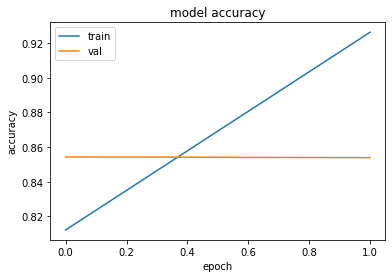

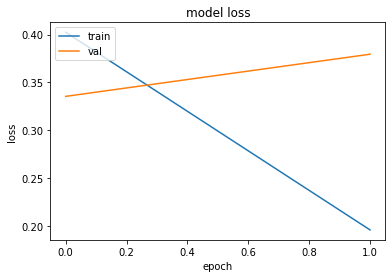

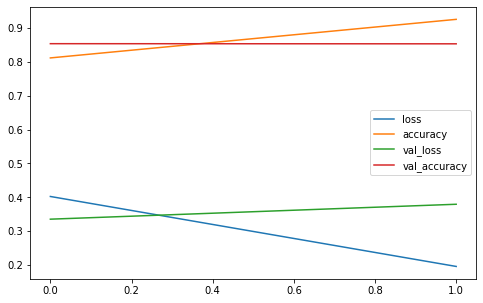

In [ ]:
#This builds a graph with the available metrics of the history for all datasets of the history
from matplotlib import pyplot as plt
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
pd.DataFrame(history).plot(figsize=(8,5))
plt.show()

# LSTM Model

In [ ]:
modelLSTM = load_model('/content/model_LSTM.hdf5')
history=np.load('my_history_LSTM.npy',allow_pickle='TRUE').item()

In [ ]:
modelLSTM.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 43, 148)           25875432  
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               99600     
_________________________________________________________________
dense_30 (Dense)             (None, 30)                3030      
_________________________________________________________________
dropout_20 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_21 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 2)               

In [ ]:
# Evaluate the model
loss, acc = modelLSTM.evaluate(X_test, Y_test, verbose=1)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

1245/1245 [==============================] - 21s 16ms/step - loss: 0.3209 - accuracy: 0.8641
Untrained model, accuracy: 86.41%


In [ ]:
#test validation
from sklearn.metrics import confusion_matrix,classification_report


Y_pred = modelLSTM.predict_classes(X_test,batch_size = 128)
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion matrix [[ 9022  3503]
 [ 1907 25388]]
              precision    recall  f1-score   support

           0       0.83      0.72      0.77     12525
           1       0.88      0.93      0.90     27295

    accuracy                           0.86     39820
   macro avg       0.85      0.83      0.84     39820
weighted avg       0.86      0.86      0.86     39820



# BLSTM Model

In [ ]:
modelBLSTM = load_model('/content/model_BLSTM.hdf5')
history=np.load('/content/my_history_BLSTM.npy',allow_pickle='TRUE').item()

In [ ]:
modelBLSTM.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 43, 148)           25875432  
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100)               79600     
_________________________________________________________________
dense_21 (Dense)             (None, 30)                3030      
_________________________________________________________________
dropout_14 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_15 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                

In [ ]:
# Evaluate the model
loss, acc = modelBLSTM.evaluate(X_test, Y_test, verbose=1)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

1245/1245 [==============================] - 17s 14ms/step - loss: 0.3130 - accuracy: 0.8676
Untrained model, accuracy: 86.76%


In [ ]:
#test validation
from sklearn.metrics import confusion_matrix,classification_report


Y_pred = modelBLSTM.predict_classes(X_test,batch_size = 128)
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


confusion matrix [[ 9190  3335]
 [ 1939 25356]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78     12525
           1       0.88      0.93      0.91     27295

    accuracy                           0.87     39820
   macro avg       0.85      0.83      0.84     39820
weighted avg       0.87      0.87      0.87     39820



In [ ]:
##predict sentiments from BLSTM model (best model accuracy)

text = ['bravo arbeya enti b alef rajel w zied el meki désolé sonbel a8a ragas el fehri eli ken chochou trabelseya ezouz mahomchi rjel w laba tjib laba w tjib esid da3as w etiiiiiiiit tjib etiiiiiiit w']
text2 = ['araftha aka tebda fel 5ra lrasek w t9olhom le le jawi behy']

def pred(text):
  #vectorizing the tweet by the pre-fitted tokenizer instance
  twt = token.texts_to_sequences(text)
  #padding the tweet to have exactly the same shape as `embedding_2` input
  twt = pad_sequences(twt, maxlen=max_length, dtype='int32', value=0)
  print(text)
  print(twt)
  sentiment = modelBLSTM.predict(twt)[0]
  if ((sentiment[0])>0.5):
    print("positive")
  elif ((sentiment[0])<=0.5):
    print("negative")

pred(text)    

# Results of all models ;) 
## best accuracy model is our approach based on BI-LSTM :D 

In [ ]:
from prettytable import PrettyTable
z = PrettyTable()
z.field_names = ["Vector","Algorithm","Train AUC", "Test AUC","Train accuracy", "Test accuracy"]
z.add_row(["bow","decision_tree", 0.8957002038100872,0.8313505440004316,0.84,0.80])
z.add_row(["tfidf","decision_tree",0.8985122747881047, 0.8228598236116917,0.84,0.79 ])
z.add_row(["avg-word2vec","decision_tree",0.826594263284955,0.7952440061500485,0.77,0.74])
#z.add_row(["tfidfw2v","decision_tree",500,10,0.7986216813232861,0.7865140140091872])
z.add_row(['-----','-----','-----','-----','-----','-----'])

z.field_names = ["Vector","Algorithm","Train AUC", "Test AUC","Train accuracy", "Test accuracy"]

z.add_row(["bow","logistic regression",0.9900894149763044, 0.9151443217010508, 0.96,0.86])
z.add_row(["tfidf","logistic regression",0.9874908408313611,0.9239911351003551,0.96,0.86])    
z.add_row(["avg-word2vec","logistic regression",0.7779062541621549,0.7779062541621549,0.73,0.73])
#z.add_row(["tfidf-word2vec","logistic regression","l1",10,0.8857145235571816,0.8847929213341348])
z.add_row(['-----','-----','-----','-----','-----','-----'])
z.add_row(['-----','-----','-----','-----','-----','-----'])
z.add_row(["bow","naive-bayes",0.9774466824302217, 0.9104516992132788,0.94,0.85])
z.add_row(["tfidf","naive-bayes",0.9827170273520545,0.9226525781863021,0.94,0.86])
z.add_row(['-----','-----','-----','-----','-----','-----'])
z.add_row(['-----','-----','-----','-----','-----','-----'])
z.add_row(["bow","random forest",0.8442616728885198,0.8266136030388367,0.79,0.77])
z.add_row(["tfidf","random forest",0.8528878021267111,0.8304146257739111,0.79,0.78])
z.add_row(["avg-word2vec","random forest",0.991563982751009,0.8723372849163484,0.96,0.81])
#z.add_row(["tfidfw2v","random forest",120,30,0.9999870561042803,0.8766026923217098])
z.add_row(['-----','-----','-----','-----','-----','-----'])
z.add_row(['-----','-----','-----','-----','-----','-----'])
z.add_row(["bow","SVM (linear kernel)",0.9465613096715133,0.9034863515302616,0.85,0.82])
z.add_row(["tfidf","SVM (linear kernel)",0.9086455785129708,0.883245069042326,0.77,0.77])
z.add_row(["avg-word2vec","SVM (linear kernel)",0.7640582225935644,0.7674311992205425,0.71,0.72])
#z.add_row(["tfidf-w2v","SVM","linear","l2",0.001,"-","-",0.8840266485280304,0.8828121426206832])
z.add_row(["bow","SVM (RBF kernel)",0.8074894126573373,0.7688631267392169,0.76,0.74])
z.add_row(["tfidf","SVM (RBF kernel)",0.7972934517858675,0.7684690854203935,0.77,0.75])
z.add_row(["avg-word2vec","SVM (RBF kernel)",0.8060391124173463,0.7272053243846486,0.77,0.73])
#z.add_row(["tfidf-w2v","SVM","RBF","-","-",1000,0.01,0.8979185918936899,0.8832558625135044])
z.add_row(['-----','-----','-----','-----','-----','-----'])
z.add_row(['-----','-----','-----','-----','-----','-----'])
z.add_row(["bow","xgboost",0.8875529936403443,0.8541088581344501,0.82,0.79])
z.add_row(["tfidf","xgboost",0.90591200299262,0.8558300154276457,0.83,0.79])
z.add_row(["avg-word2vec","xgboost",0.9942503424839467,0.8775042918941355,0.96,0.81])
print(z)

+--------------+---------------------+--------------------+--------------------+----------------+---------------+
|    Vector    |      Algorithm      |     Train AUC      |      Test AUC      | Train accuracy | Test accuracy |
+--------------+---------------------+--------------------+--------------------+----------------+---------------+
|     bow      |    decision_tree    | 0.8957002038100872 | 0.8313505440004316 |      0.84      |      0.8      |
|    tfidf     |    decision_tree    | 0.8985122747881047 | 0.8228598236116917 |      0.84      |      0.79     |
| avg-word2vec |    decision_tree    | 0.826594263284955  | 0.7952440061500485 |      0.77      |      0.74     |
|    -----     |        -----        |       -----        |       -----        |     -----      |     -----     |
|     bow      | logistic regression | 0.9900894149763044 | 0.9151443217010508 |      0.96      |      0.86     |
|    tfidf     | logistic regression | 0.9874908408313611 | 0.9239911351003551 |      0.

In [ ]:
from prettytable import PrettyTable
z = PrettyTable()
z.field_names = ["Model","Total params","Epochs","Optimizer","Batch_Size","Testloss","Test accuracy"] 
z.add_row(["RNN Simple",25.900534, 2,"Adam", 148, 0.39 ,0.85])
z.add_row(["LSTM",25.978559, 1,"Adam",148,0.32 ,0.86])
z.add_row(["BI-LSTM",25.958559, 1,"Adam", 148, 0.31 ,0.87])
print(z)

+------------+--------------+--------+-----------+------------+----------+---------------+
|   Model    | Total params | Epochs | Optimizer | Batch_Size | Testloss | Test accuracy |
+------------+--------------+--------+-----------+------------+----------+---------------+
| RNN Simple |  25.900534   |   2    |    Adam   |    148     |   0.39   |      0.85     |
|    LSTM    |  25.978559   |   1    |    Adam   |    148     |   0.32   |      0.86     |
|  BI-LSTM   |  25.958559   |   1    |    Adam   |    148     |   0.31   |      0.87     |
+------------+--------------+--------+-----------+------------+----------+---------------+
